In [1]:
from seleniumextractor import SeleniumExtractor
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support import expected_conditions as EC
from decimal import *
from selenium_error import *
from configReader_WL import configReader_WL
import random
import logging
import logging.config
import sys
import pandas as pd
import datetime as dt
import time
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
current_date = dt.datetime.today().strftime("%m%d%Y")

In [3]:

def _get_config(property):
    return(configReader_WL.get_setting(property))
    return(configReader_WL.get_setting(property))

marketinout_loginurl = _get_config("login_link")
marketinout_username = _get_config("username")

In [4]:
file_path = "C://Users//Sonam//Downloads//chromedriver_win32" + "//"
wl_file_path = "C://Users//Sonam//OneDrive//Documents//watchlists//asx"+"//"

In [5]:
marketinout_loginurl = _get_config("login_link")
marketinout_username = _get_config("username")
selextractor = SeleniumExtractor(marketinout_loginurl)
elem = selextractor.get_elem_by_id("l")
elem.send_keys(marketinout_username)
elem = selextractor.get_elems_by_class("button")[0].click()

In [6]:
_match_xpath = _get_config("match_xpath")
_minervini = _get_config("minervini")
_minervini_download_fn = _get_config("minervini_fn")
_1_month = _get_config("1_month")
_1_month_fn = _get_config("1_month_fn")
_3_month = _get_config("3_month")
_3_month_fn = _get_config("3_month_fn")
_6_month = _get_config("6_month")
_6_month_fn = _get_config("6_month_fn")


In [7]:
def get_scanner_details(url,selextractor,csv_file_name):
    selextractor.driver.get(url)
    selextractor.driver.get("https://www.marketinout.com/stock-screener/csv_stocks.csv")
    #insert a wait here for few seconds for the file to be downlaoded
    time.sleep(3)
    df = pd.read_csv("C://Users//Sonam//Downloads//chromedriver_win32" + "//" + csv_file_name)
    return df
    

In [8]:
# def generate_watchlist(wl_url,sel,file_name):
#     df = get_scanner_details(wl_url,sel,file_name)
#     symbol_str = get_watchlist(df)
#     output_file_name = file_name.split('.')[0]
#     write_watchlist(output_file_name,symbol_str)
#     #delete the filename after processing to keep the directory clean
#     os.remove(file_path+file_name)
    
    

In [9]:
def generate_sectorData(wl_url,sel,file_name):
    df = get_scanner_details(wl_url,sel,file_name)
    os.remove(file_path+file_name)
    return df

In [10]:
df = generate_sectorData(_1_month,selextractor,_1_month_fn)
df2 = generate_sectorData(_3_month,selextractor,_3_month_fn)
df3 = generate_sectorData(_6_month,selextractor,_6_month_fn)

In [11]:
df_filtered = df[df['1_mths_rs'] > 89 ]
df_filtered2 = df2[df2['3_mths_rs'] > 89 ]
df_filtered3 = df3[df3['6mths_rs'] > 89 ]

In [12]:
# fig, axs = plt.subplots(1,2,figsize=(20, 20))
# df_filtered['Industry'].value_counts().plot(kind='pie',ax = axs[0],title='Industy by 1 Month')
# df_filtered['Sector'].value_counts().plot(kind='pie',ax = axs[1],title='Sector by 1 Month')



C:\Users\Sonam\anaconda3\envs\IBKR_2\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Sector by 6 Month'}, ylabel='Sector'>

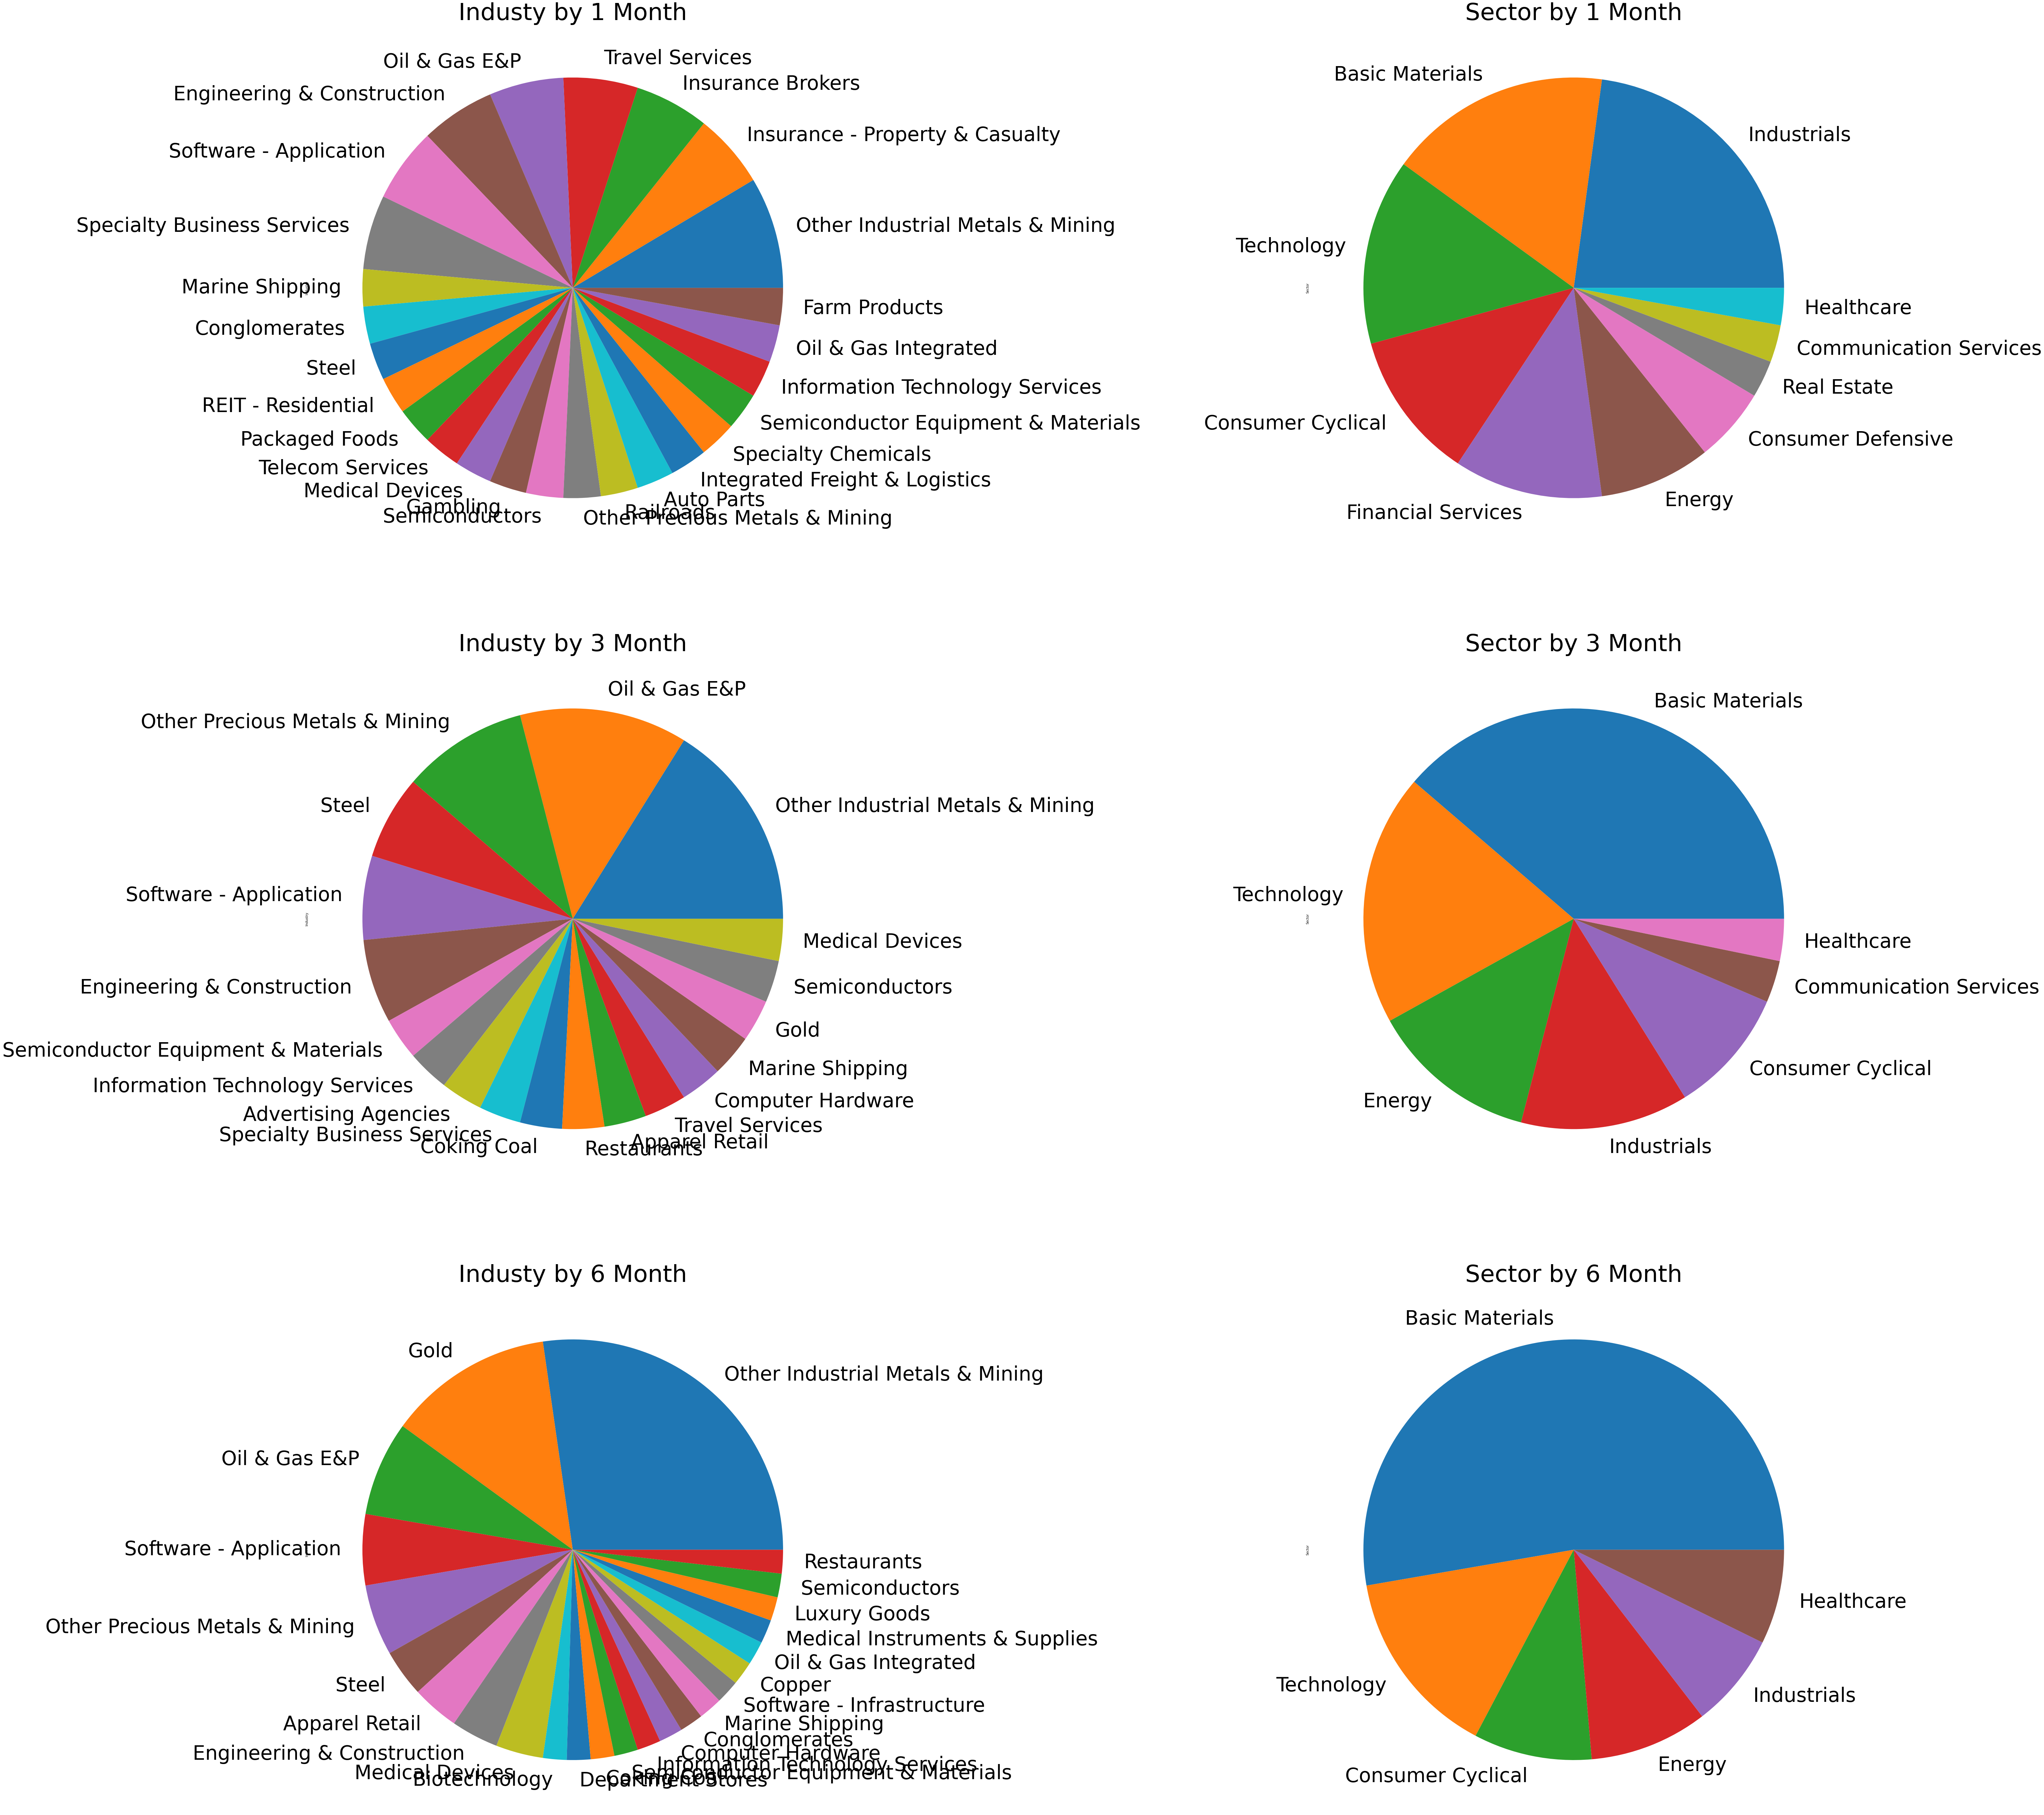

In [13]:
fig, axs = plt.subplots(3,2,figsize=(100, 100))
plt.rc('font', size=60)    
df_filtered['Industry'].value_counts().plot(ax=axs[0,0],kind='pie',title='Industy by 1 Month')
df_filtered['Sector'].value_counts().plot(ax=axs[0,1],kind='pie',title='Sector by 1 Month')
df_filtered2['Industry'].value_counts().plot(ax=axs[1,0],kind='pie',title='Industy by 3 Month')
df_filtered2['Sector'].value_counts().plot(ax=axs[1,1],kind='pie',title='Sector by 3 Month')
df_filtered3['Industry'].value_counts().plot(ax=axs[2,0],kind='pie',title='Industy by 6 Month')
df_filtered3['Sector'].value_counts().plot(ax=axs[2,1],kind='pie',title='Sector by 6 Month')